# Problem:
#### Given any integer number, write a function to find the shortest path to 1. At each step, you can do the following:
* If the input is divisible by three, you can divide it by three
* If the input is divisible by two, you can divide it by two
* You can add one

### The Naive Approach
#### Key notes:
* Nested arrays in the buffer so that each sub-array will correspond to a step / level of depth in the decision tree
* Sliding window with an incrementing counter to traverse the sub-arrays and generate options
* Cache array to capture all options at each step before updating the buffer and wiping the cache


In [1]:
class GetToOneNaive:
    def __init__(self, number):
        self.number = number
        self.buffer = [[number]]
    
    counter = 0    
    nodes = 0
    
    def parseTree(self):
        cache = []     
        while True:
            window = self.buffer[self.counter]
            # print(self.buffer)
            for i in window:
                if i %3 == 0:
                    cache.append(int(i / 3))
                if i %2 == 0:
                    cache.append(int(i / 2))
                cache.append(i + 1)
                
            self.buffer.append(cache)
                    
            if 1 in self.buffer[self.counter]:
                self.countNodes()
                return self.counter, self.nodes
                
            self.counter+=1
            cache=[]
            
    def countNodes(self):
        self.nodes = sum([1 for i in self.buffer for i in i])
        # print('{} nodes created to find solution'.format(sum([1 for i in self.buffer for i in i])))
        # print('{} steps needed to reach one from {}'.format(self.counter, self.number))

In [2]:
naive = GetToOneNaive(107)
naive.parseTree()
print('Steps: {} Nodes: {}'.format(naive.counter, naive.nodes))


Steps: 6 Nodes: 189


### Minor pruning:
#### Deduplicating the buffer sub-arrays
Passing two equal numbers, 5 and 5 for example, will result in two identical branches. To optimize and reduce the amount of nodes created to solve this problem, we can eliminate duplicates in the caching layer. By making the cache a set rather than an array, we ensure that no duplicates are passed to the buffer or being parsed in the next cycle.

In [3]:
class GetToOnePruned:
    def __init__(self, number):
        self.number = number
        self.buffer = [[number]]
    
    counter = 0
    nodes = 0
    def parseTree(self):
        cache = set()     
        while True:
            window = self.buffer[self.counter]
            for i in window:
                if i %3 == 0:
                    cache.add(int(i / 3))
                if i %2 == 0:
                    cache.add(int(i / 2))
                cache.add(i + 1)
                
            self.buffer.append(cache)
                    
            if 1 in self.buffer[self.counter]:
                self.countNodes()
                return self.counter, self.nodes
                
            self.counter+=1
            cache=set()
            
    def countNodes(self):
        self.nodes = sum([1 for i in self.buffer for i in i])
        # print('{} nodes created to find solution'.format(sum([1 for i in self.buffer for i in i])))
        # print('{} steps needed to reach one from {}'.format(self.counter, self.number))

In [4]:
pruned = GetToOnePruned(107)
pruned.parseTree()
print('Steps: {} Nodes: {}'.format(pruned.counter, pruned.nodes))


Steps: 6 Nodes: 89


In [5]:
test_cases = [1, 18, 56, 84, 92 ,192, 208, 256, 350, 425, 500, 620, 731]
naive_nodes = []
pruned_nodes = []

for i in range(len(test_cases)):
    naive_case = GetToOneNaive(test_cases[i]).parseTree()[1]
    naive_nodes.append(naive_case)
    
    pruned_case = GetToOnePruned(test_cases[i]).parseTree()[1]
    pruned_nodes.append(pruned_case)

print(naive_nodes)
print(pruned_nodes)
    
    

[2, 38, 252, 400, 301, 504, 319, 465, 1625, 1049, 1994, 1132, 4163]
[2, 27, 111, 138, 126, 177, 152, 207, 328, 247, 371, 321, 532]


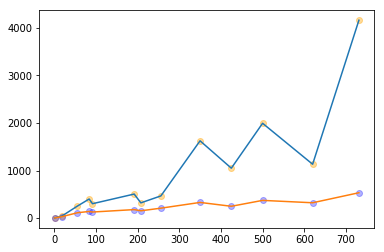

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x1 = test_cases
y1 = naive_nodes
x2 = test_cases
y2 = pruned_nodes

plt.plot([test_cases], [naive_nodes], 'go-', label='line 1', linewidth=2, alpha=0.4, color="orange")
plt.plot([test_cases], [pruned_nodes], 'go-', label='line 2', alpha=0.3, color="blue")

plt.plot(x1, y1, x2, y2, antialiased=True)

plt.show()

In [10]:
container = []
for i in range(len(pruned_nodes)):
    if naive_nodes[i] - pruned_nodes[i] != 0:
        change = (naive_nodes[i]-pruned_nodes[i])/naive_nodes[i]
        container.append(change)
    else:
        container.append(float(0))

avg = sum(container)/len(container)
print('{0:0.0%} less nodes on average with pruning.'.format(avg))

60% less nodes with pruning.


In [11]:
# Noodling with nested array comprehensions
nestedArrays = [[1,4,1,9],[1,33,1],[100]]

print([i for i in nestedArrays for i in i])
print([1 for i in nestedArrays for i in i])
print(sum([i for i in nestedArrays for i in i]))

[1, 4, 1, 9, 1, 33, 1, 100]
[1, 1, 1, 1, 1, 1, 1, 1]
150
